In [24]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas library
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetching Bitcoin stock data
BTC_stock = yf.download("BTC-USD", start='2014-01-01', end='2024-12-01')

[*********************100%***********************]  1 of 1 completed


In [27]:
print (BTC_stock)

Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2014-09-17    457.334015    457.334015    468.174011    452.421997   
2014-09-18    424.440002    424.440002    456.859985    413.104004   
2014-09-19    394.795990    394.795990    427.834991    384.532013   
2014-09-20    408.903992    408.903992    423.295990    389.882996   
2014-09-21    398.821014    398.821014    412.425995    393.181000   
...                  ...           ...           ...           ...   
2024-11-26  91985.320312  91985.320312  94991.750000  90770.812500   
2024-11-27  95962.531250  95962.531250  97361.179688  91778.664062   
2024-11-28  95652.468750  95652.468750  96650.203125  94677.351562   
2024-11-29  97461.523438  97461.523438  98693.171875  95407.882812   
2024-11-30  96449.054688  96449.054688  97499.343750  96144.218750   

Price              

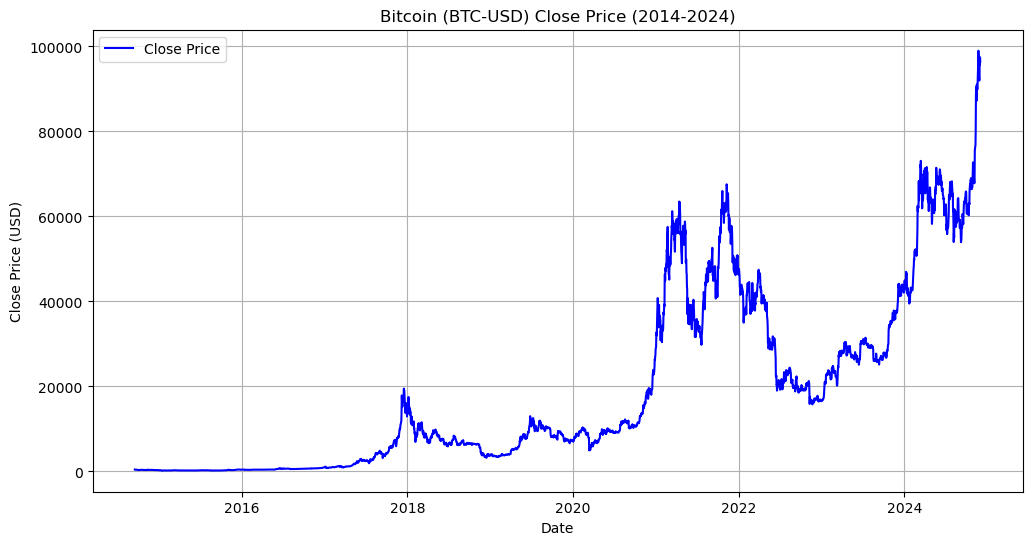

In [29]:
# Plot the 'Close' price
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(BTC_stock['Close'], label='Close Price', color='blue')
plt.title('Bitcoin (BTC-USD) Close Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()

In [53]:
import yfinance as yf

# Fetch Bitcoin stock data
BTC_stock1 = yf.download("BTC-USD", start='2014-01-01', end='2024-12-01')

# Convert all columns of the DataFrame to a NumPy array
array_all_columns = BTC_stock.to_numpy()

print("Array with all columns:")
print(array_all_columns)
print("\nShape of the array:", array_all_columns.shape)

[*********************100%***********************]  1 of 1 completed

Array with all columns:
[[4.57334015e+02 4.57334015e+02 4.68174011e+02 4.52421997e+02
  4.65864014e+02 2.10568000e+07]
 [4.24440002e+02 4.24440002e+02 4.56859985e+02 4.13104004e+02
  4.56859985e+02 3.44832000e+07]
 [3.94795990e+02 3.94795990e+02 4.27834991e+02 3.84532013e+02
  4.24102997e+02 3.79197000e+07]
 ...
 [9.56524688e+04 9.56524688e+04 9.66502031e+04 9.46773516e+04
  9.59549453e+04 5.22600083e+10]
 [9.74615234e+04 9.74615234e+04 9.86931719e+04 9.54078828e+04
  9.56539531e+04 5.49686825e+10]
 [9.64490547e+04 9.64490547e+04 9.74993438e+04 9.61442188e+04
  9.74688125e+04 3.16342279e+10]]

Shape of the array: (3728, 6)


In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
df = pd.DataFrame(BTC_stock)

In [59]:
# Step 1: Create feature set (X) by dropping the 'Close' column
X = df.drop(columns=['Close'])

In [61]:
# Step 2: Create target variable (y) as the 'Close' column
y = df['Close']

In [63]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Step 4: Initialize and fit the KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [72]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [69]:
# Step 6: Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 260161578.2436318


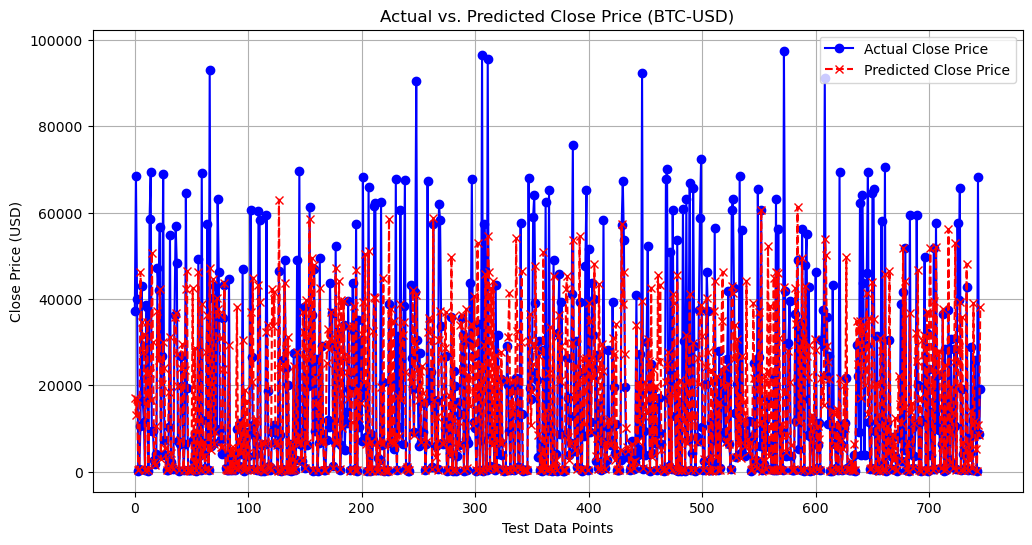

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue', marker='o', linestyle='-')
plt.plot(y_pred, label='Predicted Close Price', color='red', marker='x', linestyle='--')
plt.title('Actual vs. Predicted Close Price (BTC-USD)')
plt.xlabel('Test Data Points')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


[*********************100%***********************]  1 of 1 completed


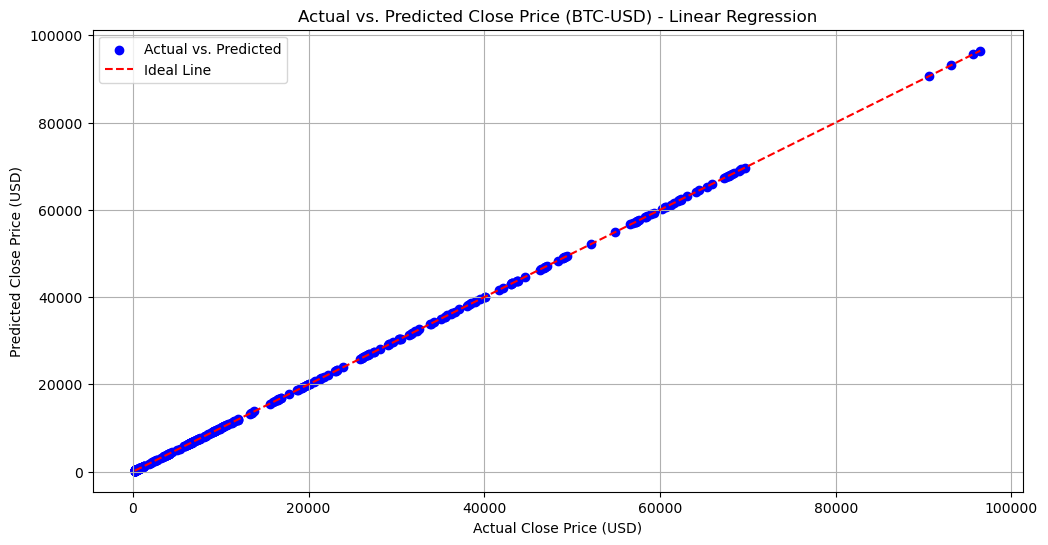

Mean Squared Error: 1.8751507464746007e-15


In [82]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetch Bitcoin stock data
BTC_stock = yf.download("BTC-USD", start='2014-01-01', end='2024-12-01')

# Prepare the data
# Features: All columns except 'Close'
X = BTC_stock.drop(columns=['Close'])

# Target: 'Close' column
y = BTC_stock['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs. Predicted Close Price (BTC-USD) - Linear Regression')
plt.xlabel('Actual Close Price (USD)')
plt.ylabel('Predicted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")